# Signature & Euler 

Consider SDE
$$
dX_t = \sum_{k=1}^{m} B^{k}X_{t}dW^{k}_{t},\quad X_{t}\in \mathbb{R}^{n}, W_{t}\in\mathbb{R}^{m}, B^{k} \in \mathbb{R}^{n\times n}
$$
<!-- $$
B^{i}B^{j} \neq B^{j}B^{i}, \quad i\neq j 
$$ -->
<!-- where
$$
B^{k} = \begin{bmatrix} \sigma_{1,1}^{k}& & \\ &\ddots& \\ & & \sigma_{d,d}^{k} \end{bmatrix}
$$ -->
<!-- Therefore 
$$
dX^{i}_t = X^{i}_{t} \sum_{k=1}^{m} \sigma^{k}_{i,i}dW^{k}_{t}
$$ -->

<!-- Analytic solution
$$
X^{i}_{t} = \exp\Big\{\sum_{k=1}^{m}\sigma_{i,i}^{k}W_{t}^{k} - \frac{t}{2}\sum_{k=1}^{m}(\sigma_{i,i}^{k})^{2}\Big\}X^{i}_{0}
$$
$$
X_{t} = \exp\Big\{\sum_{k=1}^{m}B^{k}W_{t}^{k} - \frac{t}{2}\sum_{k=1}^{m}(B^{k})^{2}\Big\}X_{0}
$$
Taylor expansion
$$
X^{i}_{t} = \sum_{d=0}^{\infty}\frac{1}{d!}\Big(\sum_{k=1}^{m}\sigma_{i,i}^{k}W_{t}^{k} - \frac{t}{2}\sum_{k=1}^{m}(\sigma_{i,i}^{k})^{2}\Big)^{d}X^{i}_{0}
$$
$$
X_{t} = \sum_{d=0}^{\infty}\frac{1}{d!}\Big(\sum_{k=1}^{m}B^{k}W_{t}^{k} - \frac{t}{2}\sum_{k=1}^{m}(B^{k})^{2}\Big)^{d}X_{0}
$$ -->

Euler approximation
<!-- $$
X^{i}_{t} = \Big(I + \sum_{k=1}^{m} \sigma^{k}_{i,i}dW^{k}_{t}\Big)X_{0}^{i}
$$ -->
$$
X_{t} = \Big(I + \sum_{k=1}^{m} B^{k}dW^{k}_{t}\Big)X_{0}
$$
Milstein approximation
<!-- $$
X_{t}^{i} = \bigg(I + \sum_{k=1}^{m} \sigma_{i,i}^{k}dW^{k}_{t} + \frac{1}{2}\Big(\sum_{k=1}^{m} \sigma_{i,i}^{k}dW^{k}_{t}\Big)^2 - \frac{t}{2}\sum_{k=1}^{m}(\sigma_{i,i}^{k})^{2}\bigg) X_{0}^{i}
$$ -->
<!-- $$
X_{t} = \bigg(I + \sum_{k=1}^{m}B^{k}dW^{k}_{t} + \frac{1}{2}\Big(\sum_{k=1}^{m} B^{k}dW^{k}_{t}\Big)^2 - \frac{t}{2}\sum_{k=1}^{m}(B^{k})^{2}\bigg) X_{0}
$$ -->
$$
X_{t} = \bigg(I + \sum_{k=1}^{m}B^{k}dW^{k}_{t} + \frac{1}{2}\sum_{i,j=1}^{m} B^{j}B^{i}\int_{0}^{t}\int_{0}^{s}dW^{i}_{r}dW^{j}_{s}\bigg) X_{0}
$$
Signature expansion
<!-- $$
X^{i}_t = \sum_{d = 0}^{\infty}\sum_{i_{1},\cdots,i_{d} = 1}^{n} \bigg(\int_{0\leq t_{1}\leq\cdots\leq t_{d}\leq t}dW^{i_{1}}_{t_{1}}\cdots dW^{i_{d}}_{t_{d}}\bigg)\sigma^{i_{d}}_{i,i}\cdots \sigma^{i_{1}}_{i,i} X^{i}_{0}
$$ -->
$$
X_t = \sum_{d = 0}^{\infty}\sum_{i_{1},\cdots,i_{d} = 1}^{n} \bigg(\int_{0\leq t_{1}\leq\cdots\leq t_{d}\leq t}dW^{i_{1}}_{t_{1}}\cdots dW^{i_{d}}_{t_{d}}\bigg)B^{i_{d}}\cdots B^{i_{1}} X_{0}
$$


Ito vs Stratonovich
$$
X\circ dW = XdW + d[X,W]
$$

\begin{equation}
    \begin{split}
        X^{(i)}_{t} &= \sum_{m=0}^{\infty}\sum_{i_{1},\cdots,i_{m} = 1}^{d}Sig_{s,t}^{(i_{1},\cdots,i_{m})}\sum_{j=1}^{d}W^{(i_{1},\cdots,i_{m})}_{i,j}X^{(j)}_{s}\\
        &= \sum_{m=0}^{\infty}\sum_{i_{1},\cdots,i_{m} = 1}^{d}\sum_{j=1}^{d}W^{(i_{1},\cdots,i_{m})}_{i,j} \cdot Sig_{s,t}^{(i_{1},\cdots,i_{m})}X^{(j)}_{s}\\
        &= \langle W , Sig_{s,t} \otimes X_{s} \rangle
    \end{split}
\end{equation}


In [1]:
%matplotlib inline
# %matplotlib qt
import base
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import torch
torch.set_default_dtype(torch.float64)
from importlib import reload
import SDEmethod, Sig_method, Resevoir

In [2]:
# label = 'diagnoal'
# label = 'commute'
label = 'non-commutative'
dimensionBM = 2
dimension = 2
B = SDEmethod.get_B(label,dimensionBM,dimension)
length = 100
horizon = 1
dt = horizon / length
initial = np.ones([dimension])  

non-commutative
[[[0. 2.]
  [0. 1.]]

 [[0. 2.]
  [0. 0.]]]
commutability
[[ 0. -2.]
 [ 0.  0.]]


In [3]:
mag = int(10000/length)
eq0 = SDEmethod.SDE_new(horizon,1.0,dimension,dimensionBM,length*mag,B)
time0 = eq0.time
BMpath0 = eq0.BM()
SDEpath0 = eq0.SDE_solver(initial, BMpath0, 'euler')
BMpath = BMpath0[::mag]
SDEpath1 = SDEpath0[::mag]

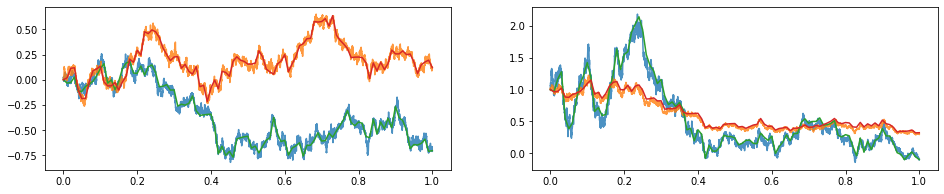

In [4]:
eq = SDEmethod.SDE_new(horizon,1.0,dimension,dimensionBM,length,B)
time = eq.time
# BMpath = eq.BM()
SDEpath = eq.SDE_solver(initial, BMpath, 'euler')
f,p=plt.subplots(1,2,figsize=(16,3))
p[0].plot(time0,BMpath0,alpha = 0.8)
p[0].plot(time,BMpath)
p[1].plot(time0,SDEpath0,alpha = 0.8)
p[1].plot(time,SDEpath)
plt.show()       

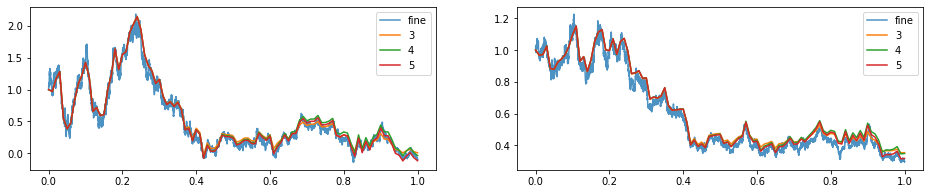

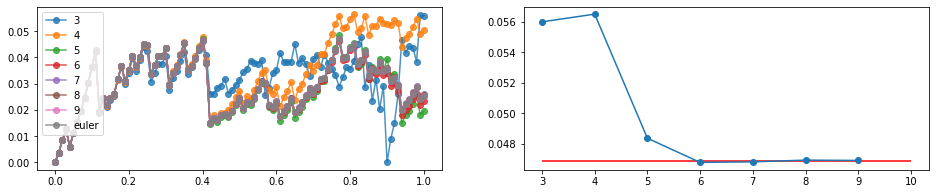

In [5]:
depth_set = list(range(3, 10))
SDEpath_sig = [Sig_method.SDEfromSig(BMpath,initial,i,B) for i in depth_set]

f,p=plt.subplots(1,2,figsize=(16,3))
p[0].plot(time0,SDEpath0[:,0],alpha = 0.8)
[p[0].plot(time,path[:,0]) for path in SDEpath_sig[:3]]
p[0].legend(['fine'] + depth_set )
p[1].plot(time0,SDEpath0[:,1],alpha = 0.8)
[p[1].plot(time,path[:,1]) for path in SDEpath_sig[:3]]
p[1].legend(['fine'] + depth_set )
plt.show()    

ERROR = []
f,p=plt.subplots(1,2,figsize=(16,3))
for path in SDEpath_sig:
    diff = np.abs(path[:,1] - SDEpath1[:,1])
    p[0].plot(time,diff,'o-',alpha = 0.8)
    ERROR.append(np.max(diff))
error0 = np.max(np.abs(SDEpath[:,1] - SDEpath1[:,1]))
p[0].plot(time,np.abs(SDEpath[:,1] - SDEpath1[:,1]),'o-',alpha = 0.8)
p[0].legend(depth_set + ['euler'])
p[1].plot(depth_set,ERROR,'o-')
p[1].hlines(error0,3,10,'r')
plt.show()

Maybe the design of resevior could utilize the expansive feature of growing signature

# Resevoir Computing

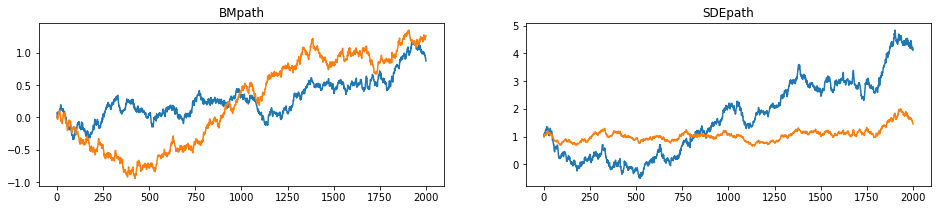

In [6]:
# name = 'linear'
# Sabr = SDE(1,1.0,2,d,M,vectorfield2dsimple,2000)
d=2
M=150
name = 'sabr'
SDE = Resevoir.SDE(1,1.0,2,d,M,Resevoir.vectorfield2d,2000)
training = SDE.path()

f1,p1=plt.subplots(1,2,figsize=(16,3))
p1[0].plot(training[0][:10000])
p1[0].set_title('BMpath')
p1[1].plot(training[1][:10000])
p1[1].set_title('SDEpath')
plt.savefig(name + '/1.png')
plt.show()

In [7]:
reload(Resevoir)
Res = Resevoir.Resevoir(SDE, training)
depth_learn = list(range(2,9))
Res.prepare(depth_learn,traindtype = 'data')
Res.train()

(1000, 2)
(1000, 150)
(1000, 7)
(1000, 15)
(1000, 31)
(1000, 63)
(1000, 127)
(1000, 255)
(1000, 511)
score:  0.9999971852158163
max coefficient:  0.5743952909078937
score:  0.9983807977086484
max coefficient:  1.5390316869431744
alpha：  1e-09
score:  0.9999885183721535
max coefficient:  1.6250049206330712
alpha：  1e-10
score:  0.9999999360337911
max coefficient:  1.6218410399211716
alpha：  1e-09
score:  0.9999999935565604
max coefficient:  3.947432768359364
alpha：  1e-09
score:  0.999999999139987
max coefficient:  11.477701395838292
alpha：  1e-10
score:  0.9999999993042148
max coefficient:  8.35492999071941
alpha：  1e-10
score:  0.9999999993393087
max coefficient:  7.787551273316406
alpha：  1e-10


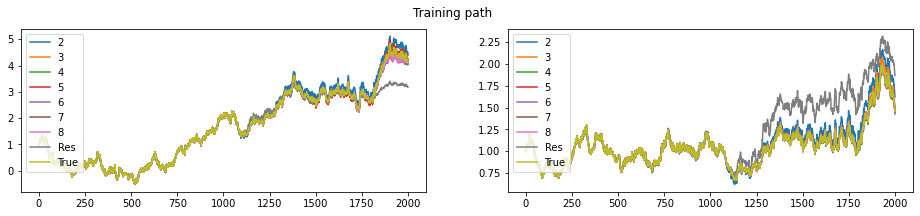

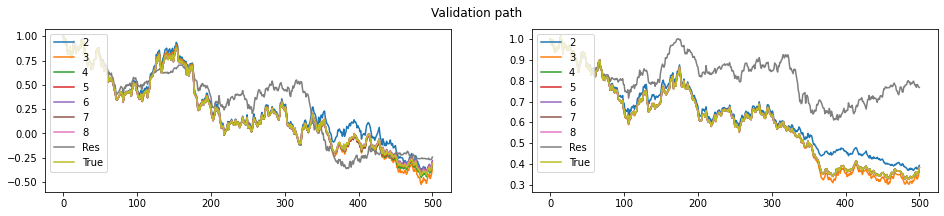

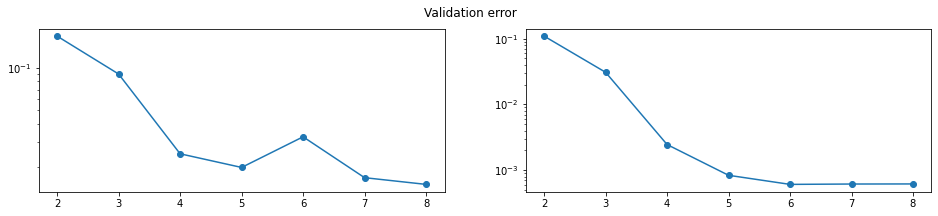

In [8]:
Res.plot_train()
Res.plot_valid()

# Generative model

In [9]:
import tensorflow as tf
import gpflow
from tqdm.auto import tqdm
from gpsig import kernels
import evaluation
reload(evaluation)
import process_discriminator
reload(process_discriminator)
reload(Resevoir)
tf.keras.backend.set_floatx('float64')

In [10]:
d=2
M=150
n_samples = 50
name = 'sabr'
SDE = Resevoir.SDE(1,1.0,2,d,M,Resevoir.vectorfield2d,50)
SDE2 = Resevoir.SDE(1,1.0,2,d,M,Resevoir.vectorfield2dsimple,50)

In [11]:
num_levels = 3
num_lags = 0
kernE = kernels.SignatureKernel(base_kernel = gpflow.kernels.Exponential(), \
                                num_levels = num_levels, order = num_levels, num_lags = num_lags)

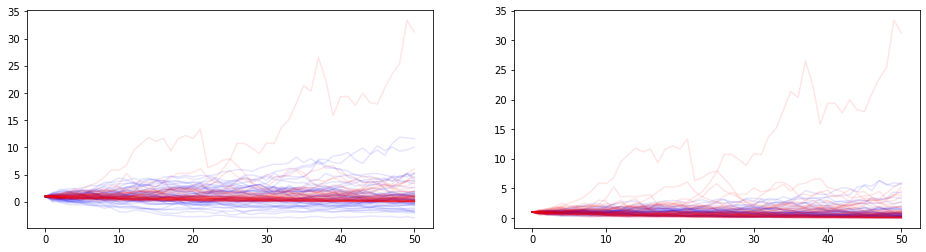

In [12]:
X = tf.constant([np.array(SDE.path()[-1]) for i in range(n_samples)])
Y = tf.constant([np.array(SDE2.path()[-1]) for i in range(n_samples)])
f,p=plt.subplots(1,2,figsize=(16,4))
for i in range(2):
    [p[i].plot(x[:,i],'b', alpha = 0.1) for x in X]
    [p[i].plot(y[:,i],'r', alpha = 0.1) for y in Y]
plt.show()

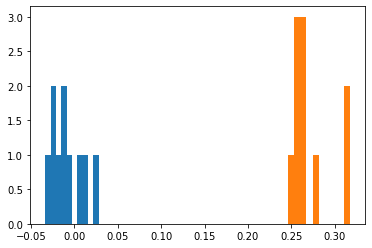

In [13]:
TU0 = []
TU1 = []
for i in tqdm(range(10)):
    X = tf.constant([np.array(SDE.path()[-1]) for i in range(n_samples)])
    Y = tf.constant([np.array(SDE2.path()[-1]) for i in range(n_samples)])
    Z = tf.constant([np.array(SDE.path()[-1]) for i in range(n_samples)])
    TU0.append(evaluation.Sig_TU2(X,Z,kernE))
    TU1.append(evaluation.Sig_TU2(X,Y,kernE))
plt.hist(TU0)
plt.hist(TU1)
plt.show()

# Random Projection

In [14]:
BM_dim = 3
depth = 5
eqq = SDEmethod.SDE_new(horizon,1.0,dimension,BM_dim,length,B)
BMpath_sig = eqq.BM()
sig_path_stream = Sig_method.sig_stream2(np.array(BMpath_sig),depth)[0,:,:].numpy()
sigdim = sig_path_stream.shape[-1]

Vec = np.array(Sig_method.sig_vectorfield(BM_dim, depth))
sig_dim = Vec.shape[-1]
initial_sig = np.zeros(sig_dim)
initial_sig[0] = 1
eq2 = SDEmethod.SDE_new(horizon,1.0,sig_dim,BM_dim,length,Vec)
SDEpath_sig = eq2.SDE_solver(initial_sig, BMpath_sig, 'euler')
np.linalg.norm(SDEpath_sig - sig_path_stream,np.inf)  

5.243201706139899e-16

Embedding 101 samples with dim 364 using various random projections
Projected 101 samples from 364 to 300 in 0.005s
Random matrix with size: 0.874MB
plotting.................................
Mean distances rate: 0.91 (0.08)


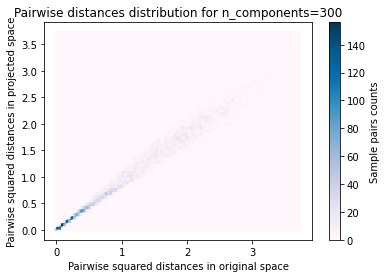

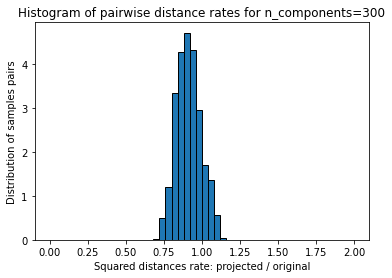

In [15]:
import random_projection
rp = random_projection.check_rp(sig_path_stream)
rp_matrix = rp.fit_transform(np.eye(sigdim)).T
almost_id = rp_matrix.T@rp_matrix

# History

In [16]:
# 'Sabr'
# B[0,0,1] = 2
# B[0,1,1] = 1
# B[1,0,1] = 2
# B[1,1,1] = 0

#     def reservoir(self,BMpath):
#         reservoirpath = np.zeros(shape = [self.batch, self.timesteps+1, self.dimensionR])
#         reservoirpath[:,0,0] = np.ones(self.batch)
#         for i in range(self.timesteps):
#             increment = BMpath[:,i+1,:] - BMpath[:,i,:]
#             reservoirpath[:,i+1,:] = reservoirpath[:,i,:] + self.reservoirfield(SDEpath[:,i,:],increment)
#         self.reservoirpath  = reservoirpath   
#         return reservoirpath    
    
#     def analytic_SDE(self,BMpath):
#         a = np.tensordot(BMpath,B,axes = [-1,0])
#         a = np.sum(a,axis = (-1))
#         b = 0.5 * self.time[:,None] * np.sum(B**2,axis = (0,1))
#         b = b[None,:,:]
#         return np.exp(a-b)
#     def vectorfield_linear(state,increment):
#         V = np.tensordot(B,state,axes = [2,1]).T
#         dX = V@increment[:,:,None]
#         return dX[:,:,0]
#     def euler(self,BMpath):
#         SDEpath = np.zeros(shape = [self.batch, self.timesteps+1, self.dimension])
#         SDEpath[:,0,:] = np.ones([self.batch,self.dimension])
#         for i in range(self.timesteps):
#             increment = BMpath[:,i+1,:] - BMpath[:,i,:]
#             SDEpath[:,i+1,:] = SDEpath[:,i,:] + self.vectorfield(SDEpath[:,i,:],increment)
#         return SDEpath

# def sig_stream1(path,depth):                 # Unified depth 
#     path = torch.Tensor(path[None,:,:])
#     batch, length, channels = path.shape
#     length = length-1
#     index2word = index_to_word(channels, depth)
#     dim_sig = len(index2word)+1
#     sig_path_split = [signatory.signature(path[:,i:i+2,:], depth) for i in range(length)] 
#     add = sig_path_split[0]
#     sig_path_stream = [add[:,None,:]]
#     for i in range(len(sig_path_split)-1):
#         add = signatory.signature_combine(add, sig_path_split[i+1], channels, depth)
#         sig_path_stream.append(add[:,None,:])
#     sig_path_stream = torch.cat(sig_path_stream,axis = 1)
#     sig_path_stream = torch.cat([torch.zeros([batch,1,dim_sig-1]),sig_path_stream],axis = 1)
#     sig_path_stream = torch.cat([torch.ones([batch,length+1,1]),sig_path_stream],axis = 2)
#     return sig_path_stream

# def sig_stream2(path,depth_max):          # growing signature with only discrete approximation
#     path = torch.Tensor(path[None,:,:])
#     batch, length, channels = path.shape
#     length = length-1
#     index2word = index_to_word(channels, depth_max)
#     dim_sig = len(index2word)+1
#     sig_path_split = [signatory.signature(path[:,i:i+2,:], 1) for i in range(length)] 
#     sig_path = sig_path_split[0]
#     dim_0 = signatory.signature_channels(channels,depth_max) - signatory.signature_channels(channels,1)
#     helper0 = torch.zeros(size = [1,dim_0])
#     sig_path_aug = torch.cat([sig_path,helper0],axis = -1)
#     sig_path_stream = [sig_path_aug[:,None,:]]
#     for i in range(len(sig_path_split)-1):
#         depth_now = min(i + 2,depth_max)
#         depth_pre = min(i + 1,depth_max)
#         dim_0 = signatory.signature_channels(channels,depth_max) - signatory.signature_channels(channels,depth_now)
#         dim_1 = signatory.signature_channels(channels,depth_now) - signatory.signature_channels(channels,depth_pre)
#         dim_2 = signatory.signature_channels(channels,depth_now) - signatory.signature_channels(channels,1)
#         helper0 = torch.zeros(size = [1,dim_0])
#         helper1 = torch.zeros(size = [1,dim_1])
#         helper2 = torch.zeros(size = [1,dim_2])

#         sig1 = torch.cat([sig_path,helper1],axis = -1)
#         sig2 = torch.cat([sig_path_split[i+1],helper2],axis = -1)
#         sig_path = signatory.signature_combine(sig1, sig2, channels, depth_now)
#         sig_path_aug = torch.cat([sig_path,helper0],axis = -1)
#         sig_path_stream.append(sig_path_aug[:,None,:])

#     sig_path_stream = torch.cat(sig_path_stream,axis = 1)
#     sig_path_stream = torch.cat([torch.zeros([batch,1,dim_sig-1]),sig_path_stream],axis = 1)
#     sig_path_stream = torch.cat([torch.ones([batch,length+1,1]),sig_path_stream],axis = 2)
#     return sig_path_stream

# def sig_vectorfield(channels, depth):
#     index2word = index_to_word(channels, depth)
#     word2index = word_to_index(channels, depth)
#     dim_sig = len(index2word)+1
#     V = [np.zeros([dim_sig, dim_sig]) for i in range(channels)]
#     for i in range(dim_sig):
#         if i > 0:
#             res = (i-1)%channels
#             word = index2word[i-1]
#             if len(word) == 1:
#                 V[res][i,0] = 1
#             else:
#                 word_reduce = tuple(list(word)[:-1])
#                 V[res][i,word2index[word_reduce]+1] = 1
#     return V

# plt.figure(figsize = (15,5))
# plt.plot(time,SDEpath)
# plt.plot(time,SDEpath1)
# plt.plot(time,SDEpath2)
# plt.legend(['analytic 1','analytic 2','euler 1','euler 2', 'milstein 1','milstein 2'])




In [17]:
# def sigBM(path):                  ### exact for (0,0) (1,1)
#     batch = path.shape[0]
#     channels = path.shape[-1]
#     diff = path[:,1,:] - path[:,0,:]
#     opt = torch.zeros([batch,6])
#     opt[:,0:2] = diff
#     opt[:,2] = (diff[:,0]**2 - dt)/2
#     opt[:,3] = (diff[:,0]*diff[:,1])/2
#     opt[:,4] = (diff[:,0]*diff[:,1])/2
#     opt[:,5] = (diff[:,1]**2 - dt)/2
#     return opt

# def sig_stream3(path,depth_max):          # growing signature only for BM 
#     path = torch.Tensor(path[None,:,:])
#     batch, length, channels = path.shape
#     length = length-1
#     index2word = index_to_word(channels, depth_max)
#     dim_sig = len(index2word)+1
#     print(dim_sig)
#     sig_path_split = [sigBM(path[:,i:i+2,:]) for i in range(length)] 
#     sig_path = sig_path_split[0]
#     dim_0 = signatory.signature_channels(channels,depth_max) - signatory.signature_channels(channels,2)
#     helper0 = torch.zeros(size = [1,dim_0])
#     sig_path_aug = torch.cat([sig_path,helper0],axis = -1)
#     sig_path_stream = [sig_path_aug[:,None,:]]
#     for i in range(len(sig_path_split)-1):
#         depth_now = min(2*(i+2),depth_max)
#         depth_pre = min(2*(i+1),depth_max)
#         dim_0 = signatory.signature_channels(channels,depth_max) - signatory.signature_channels(channels,depth_now)
#         dim_1 = signatory.signature_channels(channels,depth_now) - signatory.signature_channels(channels,depth_pre)
#         dim_2 = signatory.signature_channels(channels,depth_now) - signatory.signature_channels(channels,2)
#         helper0 = torch.zeros(size = [1,dim_0])
#         helper1 = torch.zeros(size = [1,dim_1])
#         helper2 = torch.zeros(size = [1,dim_2])

#         sig1 = torch.cat([sig_path,helper1],axis = -1)
#         sig2 = torch.cat([sig_path_split[i+1],helper2],axis = -1)
#         sig_path = signatory.signature_combine(sig1, sig2, channels, depth_now)
#         sig_path_aug = torch.cat([sig_path,helper0],axis = -1)
#         sig_path_stream.append(sig_path_aug[:,None,:])

#     sig_path_stream = torch.cat(sig_path_stream,axis = 1)
#     sig_path_stream = torch.cat([torch.zeros([batch,1,dim_sig-1]),sig_path_stream],axis = 1)
#     sig_path_stream = torch.cat([torch.ones([batch,length+1,1]),sig_path_stream],axis = 2)
#     return sig_path_stream

In [18]:
# def sig_vectorfield(channels, depth):
#     index2word = index_to_word(channels, depth)
#     word2index = word_to_index(channels, depth)
#     dim_sig = len(index2word)+1
#     V = [np.zeros([dim_sig, dim_sig]) for i in range(channels)]
#     for i in range(dim_sig):
#         if i > 0:
#             res = (i-1)%channels
#             word = index2word[i-1]
#             if len(word) == 1:
#                 V[res][i,0] = 1
#             else:
#                 word_reduce = tuple(list(word)[:-1])
#                 V[res][i,word2index[word_reduce]+1] = 1
#     return V

# def semi_group_sig(state,increment,dt):
#     dimension = state.shape[-1]
#     I = np.eye(dimension)
#     a = np.tensordot(increment,Vec,axes = 1)
#     V = I + a
#     dX = V@state
#     return dX

# sig_path_stream = sig_stream2(BMpath,10)[0,:,:].numpy()

# Vec = np.array(sig_vectorfield(dimensionBM, 10))
# sig_dim = Vec.shape[-1]
# initial_sig = np.zeros(sig_dim)
# initial_sig[0] = 1

# SDEpath_sig = np.zeros(shape = [length+1, sig_dim])
# SDEpath_sig[0,:] = initial_sig
# for i in range(length):
#     increment = BMpath[i+1,:] - BMpath[i,:]
#     SDEpath_sig[i+1,:] = semi_group_sig(SDEpath_sig[i,:],increment,1)
    
# np.linalg.norm(SDEpath_sig - sig_path_stream,np.inf)    

In [19]:
# def helperfunc(X,depth):
#     BB = B_aug(B,depth)
#     CC = np.array([M @ initial for M in BB])
#     SDEpath_by_signature = np.dot(X,CC)
#     return SDEpath_by_signature
# f,p=plt.subplots(1,2,figsize=(16,4))
# for i in range(2):
#     p[i].plot(helperfunc(Xdata[:2000],depth_learn)[:,i])
#     p[i].plot(Ydata[:2000][:,i])
# plt.savefig('training.pdf')
# plt.show()